# **Lab 8a: Object Recognition and Segmentation**
This document contains examples of prediction tasks such as image classification, object detection, segmentation and video classification.

The models were obtained from Pytorch: https://pytorch.org/vision/stable/models.html

# ***Setup: Downloading Files***

In [12]:
!gdown https://drive.google.com/uc?id=1zQ95bOJNlr3g8t9DS3JrG2Jv0hNcnjjq
!unzip files_phawAI.zip

IMAGE_CLASSIFICATION = "./test/grace_hopper_517x606.jpg"
IMAGE_OBJECT_RECOGNITION_SEG = "./test/dog1.jpg"

Downloading...
From: https://drive.google.com/uc?id=1zQ95bOJNlr3g8t9DS3JrG2Jv0hNcnjjq
To: /content/files_phawAI.zip
100% 658k/658k [00:00<00:00, 140MB/s]
Archive:  files_phawAI.zip
replace test/grace_hopper_517x606.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test/grace_hopper_517x606.jpg  
  inflating: test/dog1.jpg           
  inflating: test/v_SoccerJuggling_g23_c01.avi  


# ***Helper Functions***

In [13]:
from IPython.display import HTML
from base64 import b64encode
import os

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """ Plot a list of images. """
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        try:
            img = img.detach().numpy()
        except:
            pass
        ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

def convert_avi_to_mp4(avi_file_path, output_name):
  os.popen("ffmpeg -i '{input}' -ac 2 -b:v 2000k -c:a aac -c:v libx264 -b:a 160k -vprofile high -bf 0 -strict experimental -f mp4 '{output}.mp4'".format(input = avi_file_path, output = output_name))
  return True

def play(filename):
  html = ''
  video = open(filename,'rb').read()
  src = 'data:video/mp4;base64,' + b64encode(video).decode()
  html += '<video width=1000 controls autoplay loop><source src="%s" type="video/mp4"></video>' % src
  return HTML(html)

# ***Image Classification***

In [14]:
from torchvision.io import read_image
from torchvision.models import alexnet, AlexNet_Weights
from torchvision.models import resnet50, ResNet50_Weights

import numpy as np
from matplotlib import pyplot as plt

***Resnet***

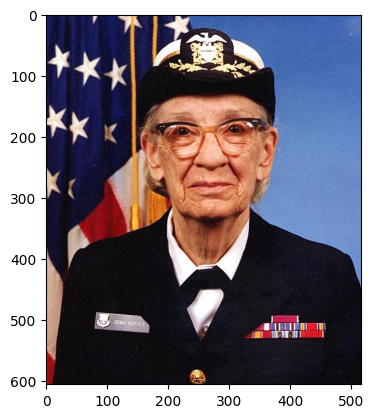

In [15]:
# Step 0. Image Visualization
img = read_image(IMAGE_CLASSIFICATION) # Tensor Object
img_grace = img.detach() # separate from the computational graph. A new tensor that no requires a gradient.
img_grace = img_grace.permute(1, 2, 0) # change order dimensions
plt.imshow(img_grace)
plt.show()

In [16]:
img = read_image(IMAGE_CLASSIFICATION)

# Step 1: Initialize model with the best available weights
weights = ResNet50_Weights.DEFAULT
print('weights: ', weights)
model = resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

weights:  ResNet50_Weights.IMAGENET1K_V2
military uniform: 10.0%


# ***Object Detection***
***SSD Model***

This model employs a similar architecture to the YOLO model. It uses the same in-class revised model [ [pdf](https://arxiv.org/abs/1512.02325) ] [ [Pytorch model](https://pytorch.org/vision/stable/models/generated/torchvision.models.detection.ssd300_vgg16.html#ssd300-vgg16) ] .

In [17]:
from torchvision.models.detection import ssd300_vgg16, SSD300_VGG16_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

In [18]:
img = read_image(IMAGE_OBJECT_RECOGNITION_SEG)

# Step 1: Initialize model with the best available weights
weights = SSD300_VGG16_Weights.DEFAULT
model = ssd300_vgg16(weights=weights, score_thresh=0.9)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]

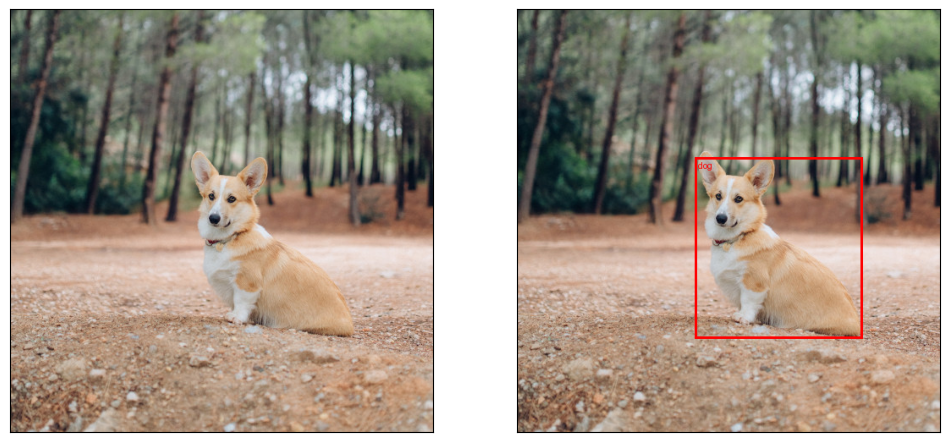

In [19]:
# Object Detection Visualization
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=3)
im = to_pil_image(box.detach())

img = img.detach()
img = img.permute(1, 2, 0)
show_images([img, im], num_rows=1, num_cols=2, scale=6)
plt.show()

What categories are available?

* [Google Search](https://www.google.com/search?q=pytorch+SSD+model+get+categories&oq=pytorch+SSD+model+get+categories&gs_lcrp=EgZjaHJvbWUyCQgAEEUYORigATIHCAEQIRigAdIBCDU5ODJqMGo3qAIAsAIA&sourceid=chrome&ie=UTF-8)
* [Documentation 1](https://docs.pytorch.org/vision/main/_modules/torchvision/models/detection/ssd.html)
* [Documentation 2](https://docs.pytorch.org/vision/main/models/generated/torchvision.models.detection.ssd300_vgg16.html#torchvision.models.detection.ssd300_vgg16/)

In [20]:
from torchvision.models._meta import _COCO_CATEGORIES
print(_COCO_CATEGORIES)

['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# ***Segmentation***

***FCN Model***

This model employs a fully convolutional architecture for the segmentation task. It Uses the same in-class revised model [ [pdf](https://arxiv.org/pdf/1411.4038) ] [ [Pytorch model](https://pytorch.org/vision/stable/models/fcn.html)]

In [21]:
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights

In [22]:
# Segmentation Prediction
img_dog = read_image(IMAGE_OBJECT_RECOGNITION_SEG)

# Step 1: Initialize model with the best available weights
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img_dog).unsqueeze(0)

# Step 4: Use the model and visualize the prediction
prediction = model(batch)["out"]
normalized_masks = prediction.softmax(dim=1)
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
mask = normalized_masks[0, class_to_idx["dog"]]

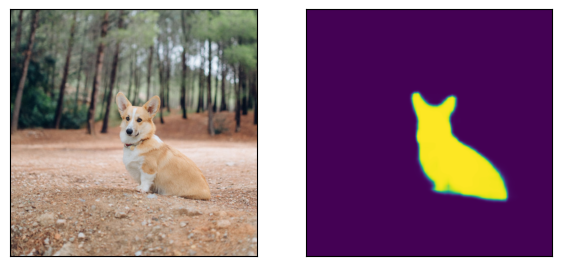

In [23]:
# Segmentation Visualization
mask_img = to_pil_image(mask)
img_dog = img_dog.detach()
img_dog = img_dog.permute(1, 2, 0)
show_images([img_dog, mask_img], num_rows=1, num_cols=2, scale=3.5)
plt.show()

# ***Acknowledgements***

Material based on documentation of [Pytorch](https://pytorch.org/vision/stable/models.html) developed by MsC. Wilbur Naike with minor modifications by Prof. Nils Murrugarra (University of Pittsburgh).